# Testing R peak detection on sample ECGs

Loading ptbxl_database.csv to map filename_hr to ecg_id...

Loading preprocessed Lead V6 signals from /Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5 and detecting R-peaks...


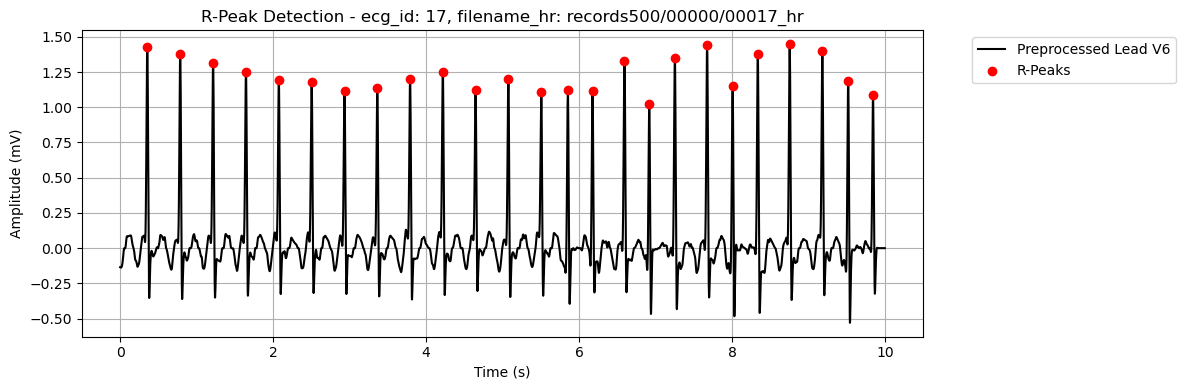

Detected 25 R-peaks for ecg_id 17, patient_id: 13619.0, filename_hr: records500/00000/00017_hr


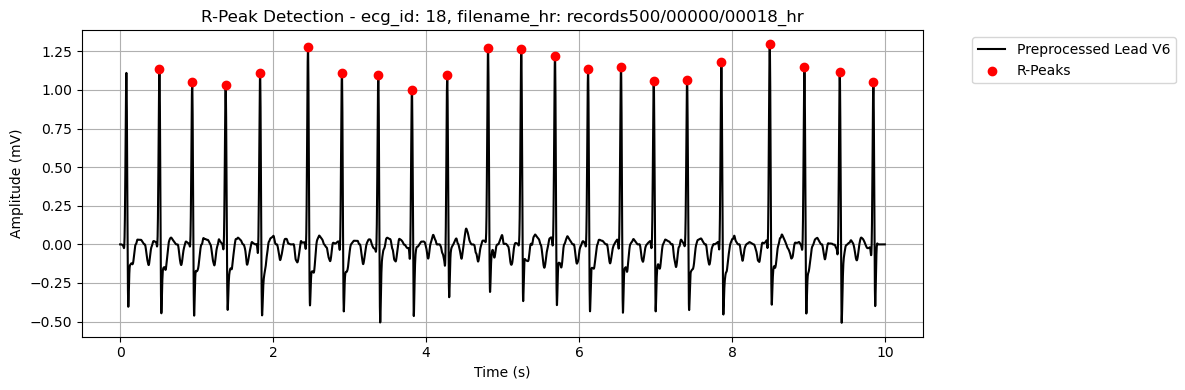

Detected 21 R-peaks for ecg_id 18, patient_id: 13619.0, filename_hr: records500/00000/00018_hr


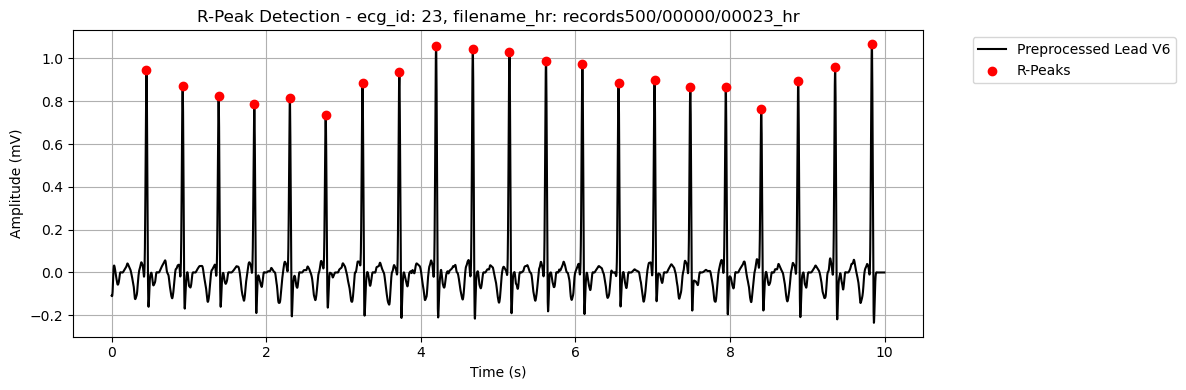

Detected 21 R-peaks for ecg_id 23, patient_id: 13619.0, filename_hr: records500/00000/00023_hr


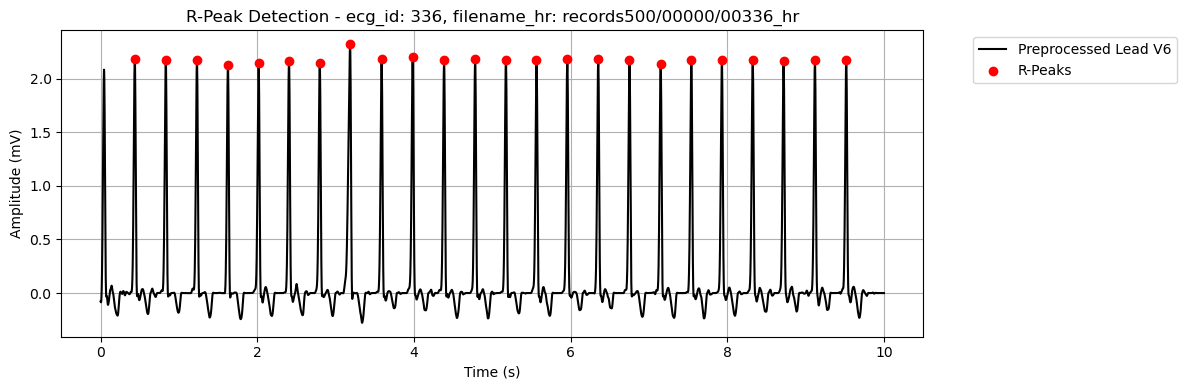

Detected 24 R-peaks for ecg_id 336, patient_id: 449.0, filename_hr: records500/00000/00336_hr


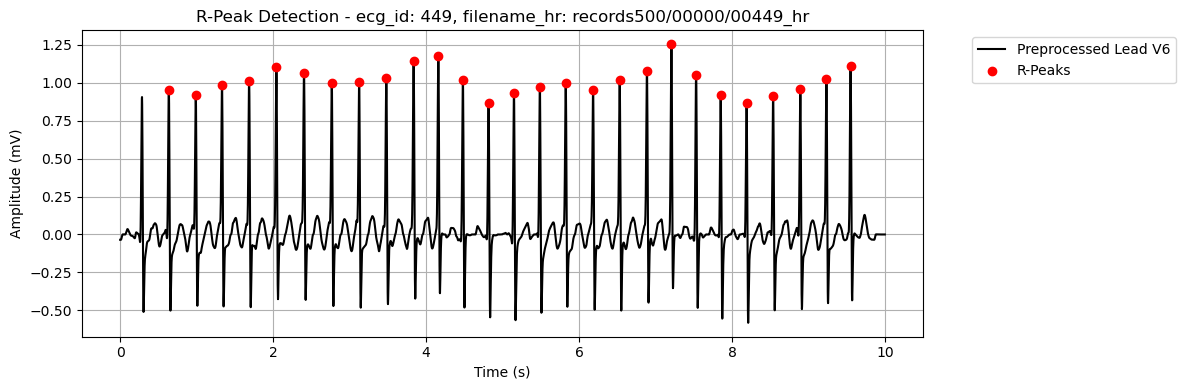

Detected 27 R-peaks for ecg_id 449, patient_id: 20057.0, filename_hr: records500/00000/00449_hr


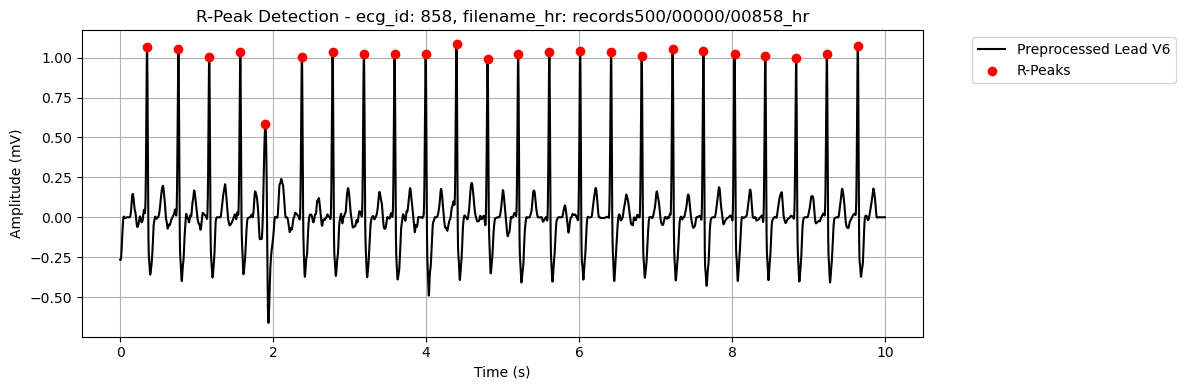

Detected 24 R-peaks for ecg_id 858, patient_id: 4520.0, filename_hr: records500/00000/00858_hr


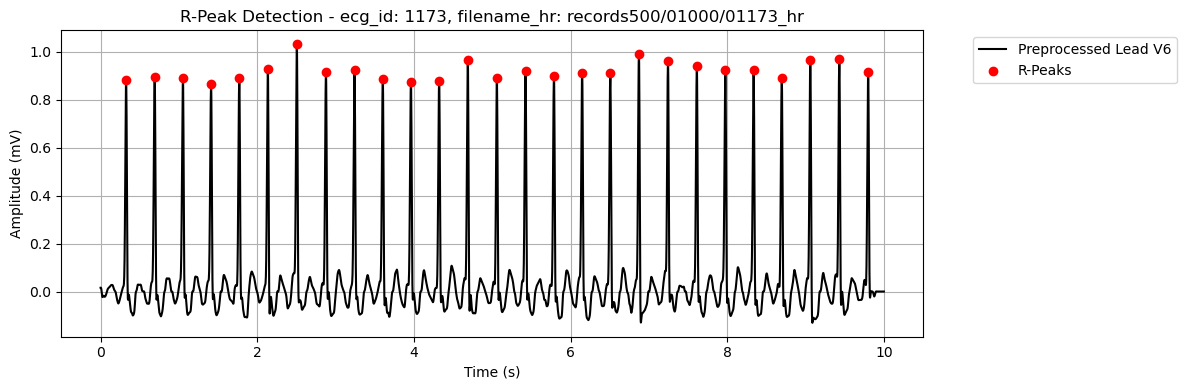

Detected 27 R-peaks for ecg_id 1173, patient_id: 653.0, filename_hr: records500/01000/01173_hr


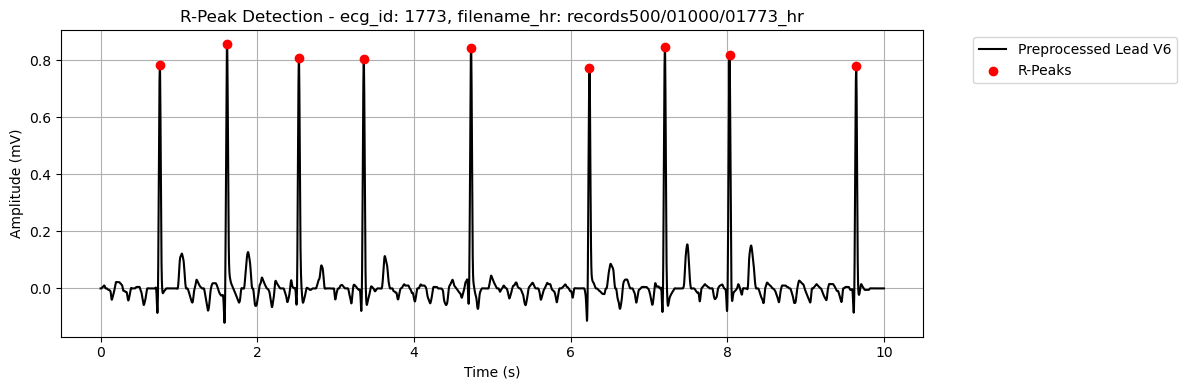

Detected 9 R-peaks for ecg_id 1773, patient_id: 9503.0, filename_hr: records500/01000/01773_hr

R-peak detection and visualization complete.


In [12]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import neurokit2 as nk

# Define the base path to the PTB-XL dataset and CSV file
base_path = Path("/Users/rohanmotanavar/datasets/PTB_XL")
csv_path = base_path / "ptbxl_database.csv"
hdf5_path = '/Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5'
output_dir = Path('/Users/rohanmotanavar/Downloads/Git/Pipeline 2 - R-Peak Detection and Clinical Rhythm Interpretation/Visualization')

# List of specific records to test R-peak detection (filename_hr values)
records_to_test = [
    "records500/00000/00017_hr",
    "records500/00000/00018_hr",
    "records500/00000/00023_hr",
    "records500/00000/00336_hr",
    "records500/00000/00449_hr",
    "records500/00000/00858_hr",
    "records500/01000/01173_hr",
    "records500/01000/01773_hr"
]

# Step 1: Load the CSV file to map filename_hr to ecg_id
print("Loading ptbxl_database.csv to map filename_hr to ecg_id...")
df = pd.read_csv(csv_path)

# Create a dictionary to map filename_hr to ecg_id
filename_to_ecg_id = dict(zip(df['filename_hr'], df['ecg_id']))

# Map the records to their ecg_id values
ecg_ids_to_test = []
for filename_hr in records_to_test:
    if filename_hr in filename_to_ecg_id:
        ecg_id = filename_to_ecg_id[filename_hr]
        ecg_ids_to_test.append(str(ecg_id))  # Convert to string for HDF5 key
    else:
        print(f"Warning: {filename_hr} not found in ptbxl_database.csv")

# Step 2: Load and perform R-peak detection on the preprocessed signals
print(f"\nLoading preprocessed Lead V6 signals from {hdf5_path} and detecting R-peaks...")
with h5py.File(hdf5_path, 'r') as h5file:
    for ecg_id in ecg_ids_to_test:
        if ecg_id in h5file:
            # Load the preprocessed Lead V6 signal
            lead_v6 = h5file[ecg_id][:]
            
            # Load metadata
            patient_id = h5file[ecg_id].attrs['patient_id']
            filename_hr = h5file[ecg_id].attrs['filename_hr']
            
            # Step 3: Detect R-peaks using NeuroKit2
            fs = 500  # Sampling frequency (Hz)
            # NeuroKit2's ecg_peaks function returns the R-peak indices and a binary signal
            _, rpeaks = nk.ecg_peaks(lead_v6, sampling_rate=fs)
            rpeak_indices = rpeaks['ECG_R_Peaks']  # Indices of R-peaks
            
            # Create a time axis (10 seconds at 500 Hz)
            time = np.arange(len(lead_v6)) / fs
            
            # Step 4: Visualize the signal with detected R-peaks
            plt.figure(figsize=(12, 4))
            plt.plot(time, lead_v6, label="Preprocessed Lead V6", color='black')
            # Plot R-peaks as red dots
            plt.scatter(time[rpeak_indices], lead_v6[rpeak_indices], color='red', label="R-Peaks", zorder=5)
            plt.title(f"R-Peak Detection - ecg_id: {ecg_id}, filename_hr: {filename_hr}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude (mV)")
            plt.grid(True)
            # Move the legend outside the plot area
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            print(f"Detected {len(rpeak_indices)} R-peaks for ecg_id {ecg_id}, patient_id: {patient_id}, filename_hr: {filename_hr}")
        else:
            print(f"Warning: ecg_id {ecg_id} not found in HDF5 file")

print("\nR-peak detection and visualization complete.")

# Clinical Interpretation

Loading ptbxl_database.csv to map filename_hr to ecg_id and retrieve diagnosis codes...

Loading preprocessed Lead V6 signals from /Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5 and detecting R-peaks...


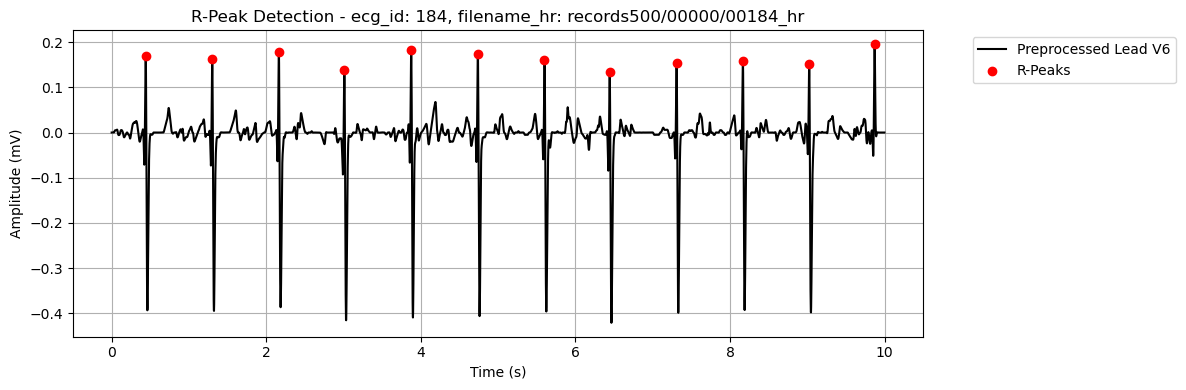


Clinical Analysis for ecg_id 184, patient_id: 13112.0, filename_hr: records500/00000/00184_hr
Diagnosis Codes (scp_codes): {'ILMI': 100.0, 'ASMI': 100.0, 'SR': 0.0}
Detected 12 R-peaks
Mean Heart Rate: 69.98 bpm
Mean RR Interval: 0.857 seconds
Standard Deviation of RR Intervals (HRV): 0.007 seconds
RR Intervals (seconds): [0.862 0.86  0.848 0.866 0.862 0.862 0.844 0.866 0.856 0.858 0.848]

Heart Rate Interpretation:
  - Heart rate within normal range (69.98 bpm, normal range: 60-100 bpm).

RR Interval Regularity Interpretation:
  - Regular rhythm (low variability in RR intervals, std: 0.007 seconds).

Heart Rate Variability (HRV) Interpretation:
  - Low HRV (std of RR intervals: 0.007 seconds).
    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).

Potential Arrhythmias:
  - No significant irregularities in RR intervals suggesting ectopic beats or pauses.

-----------------------

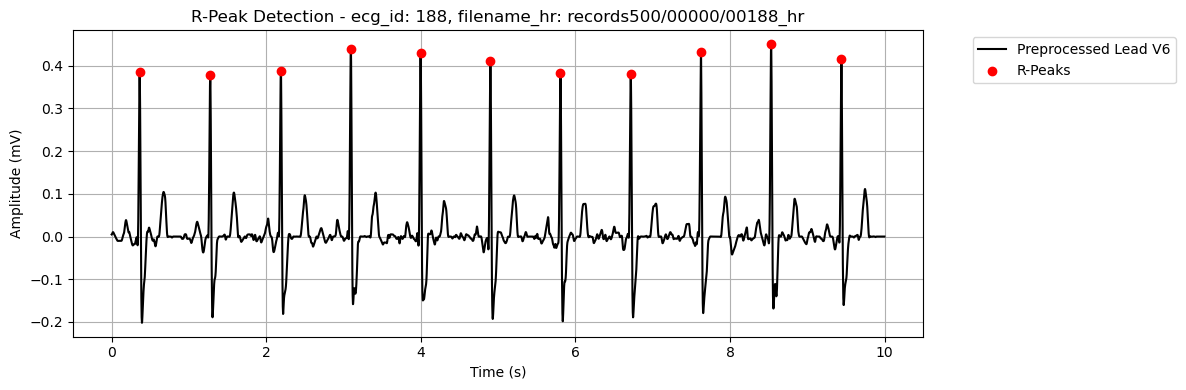


Clinical Analysis for ecg_id 188, patient_id: 13483.0, filename_hr: records500/00000/00188_hr
Diagnosis Codes (scp_codes): {'IRBBB': 100.0, 'SR': 0.0}
Detected 11 R-peaks
Mean Heart Rate: 66.08 bpm
Mean RR Interval: 0.908 seconds
Standard Deviation of RR Intervals (HRV): 0.004 seconds
RR Intervals (seconds): [0.914 0.914 0.904 0.904 0.902 0.906 0.91  0.908 0.908 0.91 ]

Heart Rate Interpretation:
  - Heart rate within normal range (66.08 bpm, normal range: 60-100 bpm).

RR Interval Regularity Interpretation:
  - Regular rhythm (low variability in RR intervals, std: 0.004 seconds).

Heart Rate Variability (HRV) Interpretation:
  - Low HRV (std of RR intervals: 0.004 seconds).
    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).

Potential Arrhythmias:
  - No significant irregularities in RR intervals suggesting ectopic beats or pauses.

-------------------------------------------

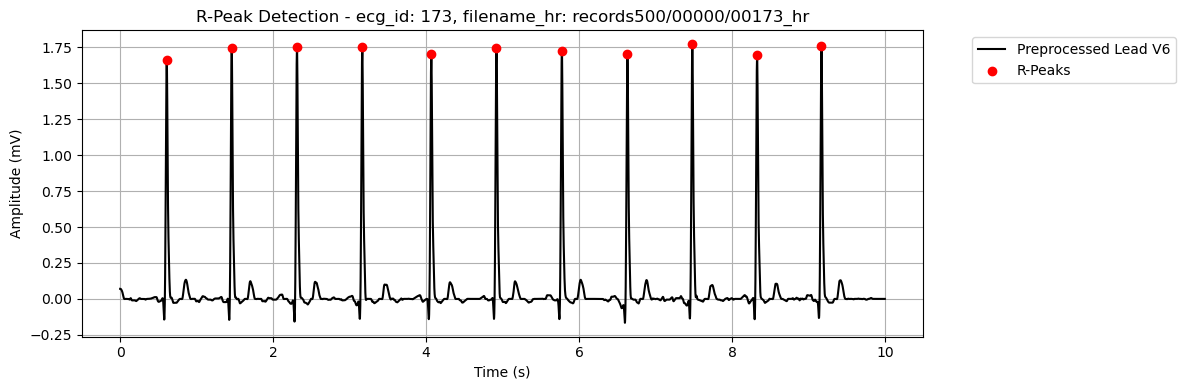


Clinical Analysis for ecg_id 173, patient_id: 10676.0, filename_hr: records500/00000/00173_hr
Diagnosis Codes (scp_codes): {'LVH': 100.0, 'ISC_': 100.0, 'SR': 0.0}
Detected 11 R-peaks
Mean Heart Rate: 70.12 bpm
Mean RR Interval: 0.856 seconds
Standard Deviation of RR Intervals (HRV): 0.016 seconds
RR Intervals (seconds): [0.848 0.854 0.854 0.902 0.852 0.856 0.856 0.85  0.846 0.842]

Heart Rate Interpretation:
  - Heart rate within normal range (70.12 bpm, normal range: 60-100 bpm).

RR Interval Regularity Interpretation:
  - Regular rhythm (low variability in RR intervals, std: 0.016 seconds).

Heart Rate Variability (HRV) Interpretation:
  - Low HRV (std of RR intervals: 0.016 seconds).
    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).

Potential Arrhythmias:
  - No significant irregularities in RR intervals suggesting ectopic beats or pauses.

------------------------------

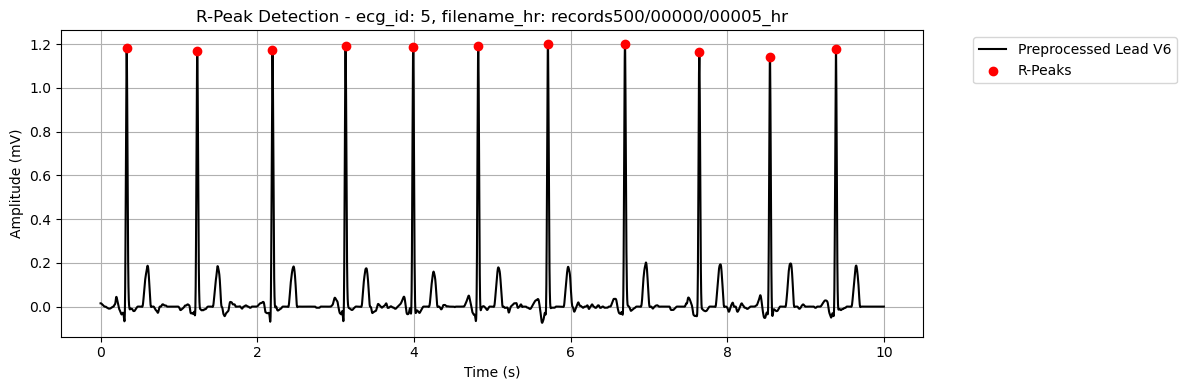


Clinical Analysis for ecg_id 5, patient_id: 17448.0, filename_hr: records500/00000/00005_hr
Diagnosis Codes (scp_codes): {'NORM': 100.0, 'SR': 0.0}
Detected 11 R-peaks
Mean Heart Rate: 66.48 bpm
Mean RR Interval: 0.905 seconds
Standard Deviation of RR Intervals (HRV): 0.049 seconds
RR Intervals (seconds): [0.9   0.96  0.934 0.862 0.83  0.89  0.984 0.948 0.902 0.842]

Heart Rate Interpretation:
  - Heart rate within normal range (66.48 bpm, normal range: 60-100 bpm).

RR Interval Regularity Interpretation:
  - Regular rhythm (low variability in RR intervals, std: 0.049 seconds).
    - Consistent with normal sinus rhythm, though low variability may suggest reduced autonomic modulation.

Heart Rate Variability (HRV) Interpretation:
  - Low HRV (std of RR intervals: 0.049 seconds).
    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).

Potential Arrhythmias:
  - No significant irregu

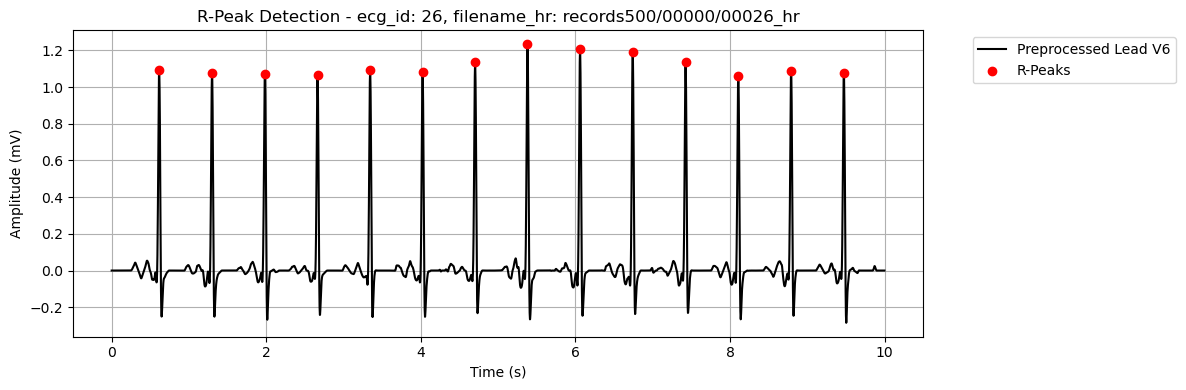


Clinical Analysis for ecg_id 26, patient_id: 13619.0, filename_hr: records500/00000/00026_hr
Diagnosis Codes (scp_codes): {'NST_': 100.0, 'DIG': 100.0, 'SR': 0.0}
Detected 14 R-peaks
Mean Heart Rate: 88.04 bpm
Mean RR Interval: 0.682 seconds
Standard Deviation of RR Intervals (HRV): 0.002 seconds
RR Intervals (seconds): [0.684 0.684 0.682 0.68  0.678 0.68  0.678 0.68  0.682 0.684 0.682 0.682
 0.684]

Heart Rate Interpretation:
  - Heart rate within normal range (88.04 bpm, normal range: 60-100 bpm).

RR Interval Regularity Interpretation:
  - Regular rhythm (low variability in RR intervals, std: 0.002 seconds).

Heart Rate Variability (HRV) Interpretation:
  - Low HRV (std of RR intervals: 0.002 seconds).
    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).

Potential Arrhythmias:
  - No significant irregularities in RR intervals suggesting ectopic beats or pauses.

------------

In [2]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import neurokit2 as nk

# Define the base path to the PTB-XL dataset and CSV file
base_path = Path("/Users/rohanmotanavar/datasets/PTB_XL")
csv_path = base_path / "ptbxl_database.csv"
hdf5_path = '/Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5'

# List of specific records to test R-peak detection (filename_hr values)
records_to_test = [
    "records500/00000/00184_hr", #MI
    "records500/00000/00188_hr", #CD
    "records500/00000/00173_hr", #HYP
    "records500/00000/00005_hr", #NORM
    "records500/00000/00026_hr" #STTC
]

# Step 1: Load the CSV file to map filename_hr to ecg_id and get diagnosis codes
print("Loading ptbxl_database.csv to map filename_hr to ecg_id and retrieve diagnosis codes...")
df = pd.read_csv(csv_path)

# Create dictionaries to map filename_hr to ecg_id and ecg_id to scp_codes
filename_to_ecg_id = dict(zip(df['filename_hr'], df['ecg_id']))
ecg_id_to_scp_codes = dict(zip(df['ecg_id'].astype(str), df['scp_codes']))

# Map the records to their ecg_id values
ecg_ids_to_test = []
for filename_hr in records_to_test:
    if filename_hr in filename_to_ecg_id:
        ecg_id = filename_to_ecg_id[filename_hr]
        ecg_ids_to_test.append(str(ecg_id))  # Convert to string for HDF5 key
    else:
        print(f"Warning: {filename_hr} not found in ptbxl_database.csv")

# Step 2: Load and perform R-peak detection on the preprocessed signals
print(f"\nLoading preprocessed Lead V6 signals from {hdf5_path} and detecting R-peaks...")
with h5py.File(hdf5_path, 'r') as h5file:
    for ecg_id in ecg_ids_to_test:
        if ecg_id in h5file:
            # Load the preprocessed Lead V6 signal
            lead_v6 = h5file[ecg_id][:]
            
            # Load metadata
            patient_id = h5file[ecg_id].attrs['patient_id']
            filename_hr = h5file[ecg_id].attrs['filename_hr']
            
            # Get the diagnosis codes (scp_codes) for this ecg_id
            scp_codes = ecg_id_to_scp_codes.get(ecg_id, "Unknown")
            
            # Step 3: Detect R-peaks using NeuroKit2
            fs = 500  # Sampling frequency (Hz)
            # NeuroKit2's ecg_peaks function returns the R-peak indices and a binary signal
            _, rpeaks = nk.ecg_peaks(lead_v6, sampling_rate=fs)
            rpeak_indices = rpeaks['ECG_R_Peaks']  # Indices of R-peaks
            
            # Step 4: Calculate RR intervals and heart rate
            # Convert R-peak indices to time (seconds)
            rpeak_times = rpeak_indices / fs
            # Calculate RR intervals (in seconds)
            rr_intervals = np.diff(rpeak_times)
            # Calculate heart rate from RR intervals (bpm)
            heart_rates = 60 / rr_intervals
            # Mean heart rate
            mean_heart_rate = np.mean(heart_rates) if len(heart_rates) > 0 else np.nan
            # Standard deviation of RR intervals (measure of heart rate variability, HRV)
            rr_std = np.std(rr_intervals) if len(rr_intervals) > 0 else np.nan
            # Mean RR interval
            mean_rr_interval = np.mean(rr_intervals) if len(rr_intervals) > 0 else np.nan
            
            # Create a time axis (10 seconds at 500 Hz)
            time = np.arange(len(lead_v6)) / fs
            
            # Step 5: Visualize the signal with detected R-peaks
            plt.figure(figsize=(12, 4))
            plt.plot(time, lead_v6, label="Preprocessed Lead V6", color='black')
            # Plot R-peaks as red dots
            plt.scatter(time[rpeak_indices], lead_v6[rpeak_indices], color='red', label="R-Peaks", zorder=5)
            plt.title(f"R-Peak Detection - ecg_id: {ecg_id}, filename_hr: {filename_hr}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude (mV)")
            plt.grid(True)
            # Move the legend outside the plot area
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()
            
            # Step 6: Clinical Interpretations
            print(f"\nClinical Analysis for ecg_id {ecg_id}, patient_id: {patient_id}, filename_hr: {filename_hr}")
            print(f"Diagnosis Codes (scp_codes): {scp_codes}")
            print(f"Detected {len(rpeak_indices)} R-peaks")
            print(f"Mean Heart Rate: {mean_heart_rate:.2f} bpm")
            print(f"Mean RR Interval: {mean_rr_interval:.3f} seconds")
            print(f"Standard Deviation of RR Intervals (HRV): {rr_std:.3f} seconds")
            print(f"RR Intervals (seconds): {rr_intervals}")

            # Heart Rate Interpretation
            print("\nHeart Rate Interpretation:")
            if mean_heart_rate < 60:
                print(f"  - Bradycardia detected (heart rate: {mean_heart_rate:.2f} bpm, normal range: 60-100 bpm).")
                if 'SBRAD' in scp_codes:
                    print("    - Consistent with diagnosis of sinus bradycardia.")
                else:
                    print("    - This may indicate an underlying condition (e.g., sick sinus syndrome, hypothyroidism) or physiological state (e.g., athletic heart).")
            elif mean_heart_rate > 100:
                print(f"  - Tachycardia detected (heart rate: {mean_heart_rate:.2f} bpm, normal range: 60-100 bpm).")
                if 'AFLT' in scp_codes or 'AFIB' in scp_codes:
                    print("    - Consistent with diagnosis of atrial flutter/fibrillation, which often causes a rapid heart rate.")
                elif 'STACH' in scp_codes:
                    print("    - Consistent with diagnosis of sinus tachycardia.")
                else:
                    print("    - This may indicate a situational response (e.g., stress, anxiety, fever) or an underlying condition (e.g., hyperthyroidism, anemia).")
            else:
                print(f"  - Heart rate within normal range ({mean_heart_rate:.2f} bpm, normal range: 60-100 bpm).")

            # RR Interval Regularity Interpretation
            print("\nRR Interval Regularity Interpretation:")
            if rr_std < 0.05:  # Threshold for regularity (50 ms)
                print("  - Regular rhythm (low variability in RR intervals, std: {:.3f} seconds).".format(rr_std))
                if 'AFLT' in scp_codes or 'AFIB' in scp_codes:
                    print("    - Consistent with atrial flutter, which typically shows regular RR intervals (e.g., 2:1 conduction).")
                elif 'NORM' in scp_codes:
                    print("    - Consistent with normal sinus rhythm, though low variability may suggest reduced autonomic modulation.")
            else:
                print("  - Irregular rhythm (high variability in RR intervals, std: {:.3f} seconds).".format(rr_std))
                if 'AFIB' in scp_codes:
                    print("    - Consistent with atrial fibrillation, which typically shows irregularly irregular RR intervals.")
                elif 'SARRH' in scp_codes:
                    print("    - Consistent with sinus arrhythmia, a normal physiological variation (e.g., respiratory sinus arrhythmia).")
                else:
                    print("    - May indicate ectopic beats (e.g., PVCs, PACs) or other arrhythmias. Further analysis needed.")

            # Heart Rate Variability (HRV) Interpretation
            print("\nHeart Rate Variability (HRV) Interpretation:")
            if rr_std < 0.05:
                print("  - Low HRV (std of RR intervals: {:.3f} seconds).".format(rr_std))
                print("    - Suggests reduced autonomic flexibility, possibly due to sympathetic overactivity (e.g., stress, arrhythmia) or underlying pathology (e.g., heart failure).")
            else:
                print("  - High HRV (std of RR intervals: {:.3f} seconds).".format(rr_std))
                print("    - Indicates good autonomic regulation, often seen in healthy individuals with strong parasympathetic influence.")

            # Potential Arrhythmias
            print("\nPotential Arrhythmias:")
            if rr_std < 0.05 and mean_heart_rate > 100:
                print("  - Regular tachycardia detected. Consistent with conditions like atrial flutter (if diagnosed) or sinus tachycardia.")
            elif rr_std > 0.05 and mean_heart_rate > 100:
                print("  - Irregular tachycardia detected. May indicate atrial fibrillation (if diagnosed) or frequent ectopic beats.")
            elif any(rr < 0.2 for rr in rr_intervals):  # Short RR intervals may indicate ectopic beats
                print("  - Very short RR intervals detected (<0.2 seconds). May indicate premature beats (e.g., PVCs, PACs).")
            elif any(rr > 1.5 for rr in rr_intervals):  # Long RR intervals may indicate pauses
                print("  - Very long RR intervals detected (>1.5 seconds). May indicate sinus pauses or AV block.")
            else:
                print("  - No significant irregularities in RR intervals suggesting ectopic beats or pauses.")

            print("\n" + "-"*80 + "\n")
        else:
            print(f"Warning: ecg_id {ecg_id} not found in HDF5 file")

print("\nR-peak detection and clinical analysis complete.")

# Iterating over entire dataset

In [3]:
import h5py
import pandas as pd
import numpy as np
from pathlib import Path
import neurokit2 as nk
from tqdm import tqdm
import csv

# Paths
base_path = Path("/Users/rohanmotanavar/datasets/PTB_XL")
csv_path = base_path / "ptbxl_database.csv"
hdf5_input_path = '/Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5'
hdf5_output_path = 'rpeak_detection_results.h5'
csv_output_path = 'rpeak_detection_results.csv'

# Load CSV for metadata
print("Loading ptbxl_database.csv...")
df = pd.read_csv(csv_path)
filename_to_ecg_id = dict(zip(df['filename_hr'], df['ecg_id']))
ecg_id_to_metadata = df.set_index('ecg_id')[['patient_id', 'scp_codes', 'age', 'sex']].to_dict('index')

# Initialize CSV file with headers
csv_headers = [
    'ecg_id', 'patient_id', 'filename_hr', 'rpeak_indices', 'rpeak_times',
    'rpeak_amplitudes', 'rr_intervals', 'mean_heart_rate', 'mean_rr_interval',
    'rr_std', 'heart_rates', 'number_of_rpeaks', 'scp_codes', 'age', 'sex'
]
with open(csv_output_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(csv_headers)

# Process the entire dataset with a progress bar
print(f"\nProcessing all records from {hdf5_input_path}...")
with h5py.File(hdf5_input_path, 'r') as h5in, h5py.File(hdf5_output_path, 'w') as h5out:
    # Use tqdm to create a progress bar
    ecg_ids = list(h5in.keys())
    for ecg_id in tqdm(ecg_ids, desc="Processing ECG records", unit="record"):
        # Load preprocessed Lead V6 signal
        lead_v6 = h5in[ecg_id][:]
        patient_id = h5in[ecg_id].attrs['patient_id']
        filename_hr = h5in[ecg_id].attrs['filename_hr']
        
        # Get additional metadata from CSV
        meta = ecg_id_to_metadata.get(int(ecg_id), {})
        scp_codes = str(meta.get('scp_codes', 'Unknown'))
        age = meta.get('age', np.nan)
        sex = meta.get('sex', 'Unknown')
        
        # R-peak detection
        fs = 500  # Sampling frequency (Hz)
        _, rpeaks = nk.ecg_peaks(lead_v6, sampling_rate=fs)
        rpeak_indices = rpeaks['ECG_R_Peaks']
        rpeak_times = rpeak_indices / fs
        rpeak_amplitudes = lead_v6[rpeak_indices]
        rr_intervals = np.diff(rpeak_times)
        heart_rates = 60 / rr_intervals
        mean_heart_rate = np.mean(heart_rates) if len(heart_rates) > 0 else np.nan
        mean_rr_interval = np.mean(rr_intervals) if len(rr_intervals) > 0 else np.nan
        rr_std = np.std(rr_intervals) if len(rr_intervals) > 0 else np.nan
        number_of_rpeaks = len(rpeak_indices)
        
        # Create group for this ecg_id in HDF5
        grp = h5out.create_group(ecg_id)
        
        # Store datasets in HDF5
        grp.create_dataset('rpeak_indices', data=rpeak_indices)
        grp.create_dataset('rpeak_times', data=rpeak_times)
        grp.create_dataset('rpeak_amplitudes', data=rpeak_amplitudes)
        grp.create_dataset('rr_intervals', data=rr_intervals)
        grp.create_dataset('heart_rates', data=heart_rates)
        
        # Store attributes in HDF5
        grp.attrs['ecg_id'] = ecg_id
        grp.attrs['patient_id'] = patient_id
        grp.attrs['filename_hr'] = filename_hr
        grp.attrs['mean_heart_rate'] = mean_heart_rate
        grp.attrs['mean_rr_interval'] = mean_rr_interval
        grp.attrs['rr_std'] = rr_std
        grp.attrs['number_of_rpeaks'] = number_of_rpeaks
        grp.attrs['scp_codes'] = scp_codes
        grp.attrs['age'] = age
        grp.attrs['sex'] = sex
        
        # Serialize arrays to strings for CSV
        rpeak_indices_str = ','.join(map(str, rpeak_indices))
        rpeak_times_str = ','.join(map(str, rpeak_times))
        rpeak_amplitudes_str = ','.join(map(str, rpeak_amplitudes))
        rr_intervals_str = ','.join(map(str, rr_intervals))
        heart_rates_str = ','.join(map(str, heart_rates))
        
        # Append to CSV
        with open(csv_output_path, 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow([
                ecg_id, patient_id, filename_hr,
                rpeak_indices_str, rpeak_times_str, rpeak_amplitudes_str,
                rr_intervals_str,
                mean_heart_rate if not np.isnan(mean_heart_rate) else 'NaN',
                mean_rr_interval if not np.isnan(mean_rr_interval) else 'NaN',
                rr_std if not np.isnan(rr_std) else 'NaN',
                heart_rates_str,
                number_of_rpeaks, scp_codes, age, sex
            ])

print(f"\nR-peak detection and metadata storage complete.")
print(f"HDF5 file saved at: {hdf5_output_path}")
print(f"CSV file saved at: {csv_output_path}")

Loading ptbxl_database.csv...

Processing all records from /Users/rohanmotanavar/Dissertation ECG Parameterization/Pipeline1_LeadV6_extraction/preprocessed_lead_v6.h5...


Processing ECG records: 100%|██████████| 21799/21799 [00:34<00:00, 635.36record/s]


R-peak detection and metadata storage complete.
HDF5 file saved at: rpeak_detection_results.h5
CSV file saved at: rpeak_detection_results.csv
